 IMDB movie reviews dataset to classify reviews as 'positive' or 'negative'. It has two categories: Pos (reviews that express a positive or favourable sentiment) and Neg (reviews that express a negative or unfavourable sentiment).
  Multinomial Naive Bayes classification model 
  Tag negative(Neg) as 0 and positive(Pos) as 1.

In [74]:
import pandas as pd
import numpy as np

In [75]:
df=pd.read_csv("movie_review_train.csv")

In [76]:
df['class'].value_counts()

Pos    800
Neg    800
Name: class, dtype: int64

In [77]:
pos_neg=df['class'].value_counts()
pos_neg

Pos    800
Neg    800
Name: class, dtype: int64

In [78]:
print("pos % is ",(pos_neg[1]/float(pos_neg[0]+pos_neg[1]))*100)

pos % is  50.0


In [79]:
df['class']=df['class'].map({"Pos":1,"Neg":0})


In [80]:
df.head()

,class,text
0,1,a common complaint amongst film critics is ...
1,1,whew this film oozes energy the kind of b...
2,1,steven spielberg s amistad which is bas...
3,1,he has spent his entire life in an awful litt...
4,1,being that it is a foreign language film with...


Let's now split the dataframe into X and y labels.

In [81]:
# convert the df to a numpy array 

x_array=df.values

In [82]:
x_train=x_array[:,1]
y_train=x_array[:,0]
y_train=y_train.astype('int')

In [83]:
print('x_train')
print(x_train)

x_train
[' a common complaint amongst film critics is   why aren t there more literate scripts available      quiz show gives signs of hope that the art of writing isn t dead in hollywood and that we need not only look to independent films for thoughtful content    paul attanasio s script takes what could have been a tepid thriller   the quiz show scandals of the late 50s   and delivers a telling parable about the emptiness of the post war american dream and the golden bubble that surrounds and protects tv networks and their sponsors    the film is riddled with telling symbols   e   g    a  58 chrysler   a radio announcement of sputnik   but is never heavy handed    deft direction by robert redford and keen performances by ralph fiennes   john turturro and rob morrow dovetail perfectly with the carefully honed script    redford departs from the usually overlight     cable tv quality   sets and camera work so common in recent 20th century period pieces    quiz show perfectly captures th

In [84]:
print('y_train')
print(y_train)

y_train
[1 1 1 ... 0 0 0]


#### Creating the Bag of Words Representation
We now have to convert the data into a format which can be used for training the model. We'll use the bag of words representation for each sentence (document).

Imagine breaking X in individual words and putting them all in a bag. Then we pick all the unique words from the bag one by one and make a dictionary of unique words.

This is called vectorization of words. We have the class CountVectorizer() in scikit learn to vectorize the words.

In [85]:
# create an object of CountVectorizer() class 
from sklearn.feature_extraction.text import CountVectorizer 
# help(CountVectorizer)

In [86]:
vec=CountVectorizer()

Here vec is an object of class CountVectorizer(). This has a method called fit() which converts a corpus of documents to a matrix of 'tokens'.

In [87]:
#fitting vectorizer on training data
vec.fit(x_train)
vec.vocabulary_

{'common': 6343,
 'complaint': 6419,
 'amongst': 1379,
 'film': 11923,
 'critics': 7439,
 'is': 16875,
 'why': 35407,
 'aren': 1839,
 'there': 32212,
 'more': 20840,
 'literate': 18743,
 'scripts': 28117,
 'available': 2351,
 'quiz': 25446,
 'show': 28864,
 'gives': 13369,
 'signs': 29019,
 'of': 22167,
 'hope': 15195,
 'that': 32168,
 'the': 32171,
 'art': 1958,
 'writing': 35819,
 'isn': 16903,
 'dead': 7967,
 'in': 15974,
 'hollywood': 15084,
 'and': 1457,
 'we': 35110,
 'need': 21440,
 'not': 21849,
 'only': 22295,
 'look': 18910,
 'to': 32570,
 'independent': 16117,
 'films': 11942,
 'for': 12399,
 'thoughtful': 32307,
 'content': 6831,
 'paul': 23237,
 'attanasio': 2205,
 'script': 28111,
 'takes': 31712,
 'what': 35283,
 'could': 7132,
 'have': 14515,
 'been': 2993,
 'tepid': 32066,
 'thriller': 32338,
 'scandals': 27828,
 'late': 18154,
 '50s': 313,
 'delivers': 8278,
 'telling': 31991,
 'parable': 23006,
 'about': 480,
 'emptiness': 10417,
 'post': 24373,
 'war': 34976,
 'amer

Countvectorizer() has converted the documents into a set of unique words alphabetically sorted and indexed.

Stop Words

We can see a few trivial words such as 'and','is','of', etc. These words don't really make any difference in classyfying a document. These are called stop words. So we would like to get rid of them.

We can remove them by passing a parameter stop_words='english' while instantiating Countvectorizer() as follows:

In [88]:
# fitting the vectorizer on training data again
# removing the stop words this time
vec = CountVectorizer(stop_words='english')
vec.fit(x_train)
vec.vocabulary_

{'common': 6284,
 'complaint': 6360,
 'film': 11832,
 'critics': 7378,
 'aren': 1810,
 'literate': 18603,
 'scripts': 27918,
 'available': 2319,
 'quiz': 25250,
 'gives': 13262,
 'signs': 28809,
 'hope': 15074,
 'art': 1928,
 'writing': 35521,
 'isn': 16771,
 'dead': 7904,
 'hollywood': 14963,
 'need': 21281,
 'look': 18770,
 'independent': 15988,
 'films': 11851,
 'thoughtful': 32060,
 'content': 6771,
 'paul': 23045,
 'attanasio': 2173,
 'script': 27912,
 'takes': 31486,
 'tepid': 31839,
 'thriller': 32090,
 'scandals': 27629,
 'late': 18017,
 '50s': 313,
 'delivers': 8215,
 'telling': 31765,
 'parable': 22815,
 'emptiness': 10340,
 'post': 24178,
 'war': 34707,
 'american': 1334,
 'dream': 9554,
 'golden': 13449,
 'bubble': 4285,
 'surrounds': 31156,
 'protects': 24849,
 'tv': 33056,
 'networks': 21378,
 'sponsors': 29948,
 'riddled': 26743,
 'symbols': 31370,
 '58': 328,
 'chrysler': 5614,
 'radio': 25314,
 'announcement': 1534,
 'sputnik': 30053,
 'heavy': 14532,
 'handed': 14185,

In [89]:
# printing feature names
print(vec.get_feature_names_out())
print(len(vec.get_feature_names_out()))

['00' '000' '007' ... 'zus' 'zwick' 'zwigoff']
35858


Suppose we don't want to consider those (rare) words which have appeared only in 3% of the documents, or say those (extremely common ones) which have appeared in 80% of the documents.

In [90]:
vec=CountVectorizer(stop_words='english',min_df=.03,max_df=0.8)
vec.fit(x_train)
vec.vocabulary_

{'common': 264,
 'critics': 323,
 'aren': 78,
 'available': 101,
 'gives': 618,
 'hope': 693,
 'art': 81,
 'writing': 1632,
 'isn': 753,
 'dead': 342,
 'hollywood': 690,
 'need': 970,
 'look': 853,
 'films': 549,
 'content': 287,
 'paul': 1037,
 'script': 1248,
 'takes': 1429,
 'thriller': 1471,
 'late': 805,
 'delivers': 357,
 'telling': 1449,
 'post': 1089,
 'war': 1571,
 'american': 59,
 'dream': 413,
 'tv': 1512,
 'radio': 1145,
 'heavy': 673,
 'direction': 386,
 'robert': 1205,
 'performances': 1043,
 'john': 766,
 'rob': 1204,
 'perfectly': 1041,
 'usually': 1537,
 'quality': 1136,
 'sets': 1272,
 'camera': 192,
 'work': 1618,
 'recent': 1165,
 'century': 213,
 'period': 1044,
 'pieces': 1056,
 'years': 1638,
 'old': 1001,
 'images': 716,
 'true': 1502,
 'era': 464,
 'generation': 605,
 'gone': 625,
 '15': 4,
 'world': 1623,
 'themes': 1461,
 'good': 626,
 'life': 831,
 'family': 508,
 'match': 894,
 'father': 521,
 'fame': 506,
 'audience': 99,
 'appear': 72,
 'familiar': 507,
 

In [91]:
# printing feature names
print(vec.get_feature_names_out())
print(len(vec.get_feature_names_out()))

['000' '10' '100' ... 'york' 'young' 'younger']
1643


In [92]:
x_train_transformed=vec.transform(x_train)
x_train_transformed

<1600x1643 sparse matrix of type '<class 'numpy.int64'>'
	with 217396 stored elements in Compressed Sparse Row format>

In [93]:
#converting transformed matrix to an array
x_train=x_train_transformed.toarray()

In [94]:
pd.DataFrame(x_train_transformed.toarray(),columns=vec.get_feature_names()).head()

C:\Users\sheenaabhishek\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,000,10,100,13,15,1995,1996,1997,1998,1999,...,written,wrong,wrote,yeah,year,years,yes,york,young,younger
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,3,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [95]:
#test set
test_df=pd.read_csv("movie_review_test.csv")

In [96]:
test_df['class']=test_df['class'].map({"Pos":1,"Neg":0})

In [97]:
test_df.head()

,class,text
0,1,films adapted from comic books have had plent...
1,1,every now and then a movie comes along from a...
2,1,you ve got mail works alot better than it des...
3,1,jaws is a rare film that grabs your atte...
4,1,moviemaking is a lot like being the general m...


In [99]:
test_df_array=test_df.values

x_test=test_df_array[:,1]
y_test=test_df_array[:,0]
y_test=y_test.astype('int')

Here, while testing we only transform the dataset but do not use the fit function.

In [100]:
x_test_transformed=vec.transform(x_test)
x_test_transformed

<400x1643 sparse matrix of type '<class 'numpy.int64'>'
	with 51663 stored elements in Compressed Sparse Row format>

In [101]:
x_test=x_test_transformed.toarray()

In [102]:
from sklearn.naive_bayes import MultinomialNB

In [103]:
mnb=MultinomialNB()

In Multinomial NB method we give the inputs as x_train and y_train. Here alpha is the term used for laplacian smoothing by default it is 1. This is used to prevent the condition of zero probability.

In [104]:
#fitting the model on training data
mnb.fit(x_train_transformed,y_train)

MultinomialNB()

Here we use the function mnb.predict to get the class and mnb.predict_proba to get the probabilities.

In [106]:
y_pred=mnb.predict(x_test_transformed)
y_pred

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,

In [107]:
pr=mnb.predict_proba(x_test_transformed)
pr

array([[4.72220911e-01, 5.27779089e-01],
       [1.46791072e-02, 9.85320893e-01],
       [8.06229525e-03, 9.91937705e-01],
       [3.82892252e-14, 1.00000000e+00],
       [9.99994569e-01, 5.43053306e-06],
       [2.06482974e-19, 1.00000000e+00],
       [1.84756956e-10, 1.00000000e+00],
       [4.41160693e-05, 9.99955884e-01],
       [6.34701076e-04, 9.99365299e-01],
       [2.15099949e-03, 9.97849001e-01],
       [1.67387911e-04, 9.99832612e-01],
       [1.53916508e-03, 9.98460835e-01],
       [9.42580804e-06, 9.99990574e-01],
       [3.94569247e-06, 9.99996054e-01],
       [1.30379599e-02, 9.86962040e-01],
       [4.95955521e-03, 9.95040445e-01],
       [4.87700524e-01, 5.12299476e-01],
       [4.84740721e-11, 1.00000000e+00],
       [1.45854901e-01, 8.54145099e-01],
       [9.79724905e-01, 2.02750951e-02],
       [1.52084321e-01, 8.47915679e-01],
       [1.09017591e-03, 9.98909824e-01],
       [9.99997220e-01, 2.78000287e-06],
       [8.18449930e-09, 9.99999992e-01],
       [2.546754

We import metrics from scikit package to build a confusion matrix and get the performance measures to check which model performs better. We need to ensure the specificity in this case must be high compared to accuracy and sensitivity.

In [108]:
from sklearn import metrics

In [109]:
metrics.accuracy_score(y_test,y_pred)

0.8275

In [110]:
confusion=metrics.confusion_matrix(y_test,y_pred)
confusion

array([[172,  28],
       [ 41, 159]], dtype=int64)

In [111]:
TN=confusion[0,0]
FP=confusion[0,1]
FN=confusion[1,0]
TP=confusion[1,1]

In [123]:
print(TN,FP)

172 28


In [115]:
sensitivity=TP/float(TP+FN)
sensitivity

0.795

In [113]:
specificity=TN/float(TN+FP)
specificity

0.86

In [116]:
accuracy=float(TN+TP)/float(TN+FP+TP+FN)
accuracy

0.8275

In [117]:
from sklearn.metrics import confusion_matrix as sk_confusion_matrix
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt
false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pr[:,1])
roc_auc=auc(false_positive_rate,true_positive_rate)

In [118]:
roc_auc

0.887675

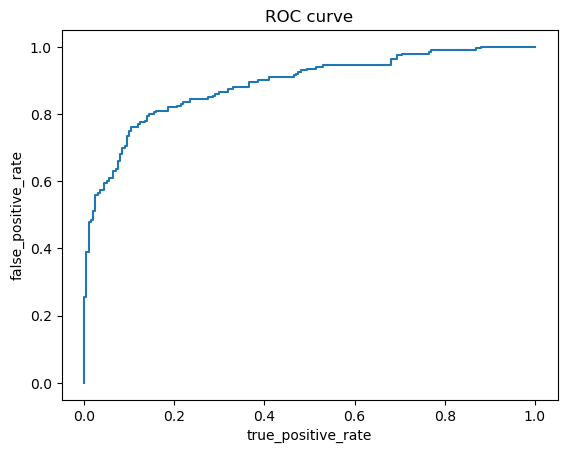

In [119]:
%matplotlib inline
plt.xlabel('true_positive_rate')
plt.ylabel('false_positive_rate')
plt.title('ROC curve')
plt.plot(false_positive_rate,true_positive_rate)

In [121]:
false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,ps[:,1])
roc_auc=auc(false_positive_rate,true_positive_rate)

NameError: name 'ps' is not defined

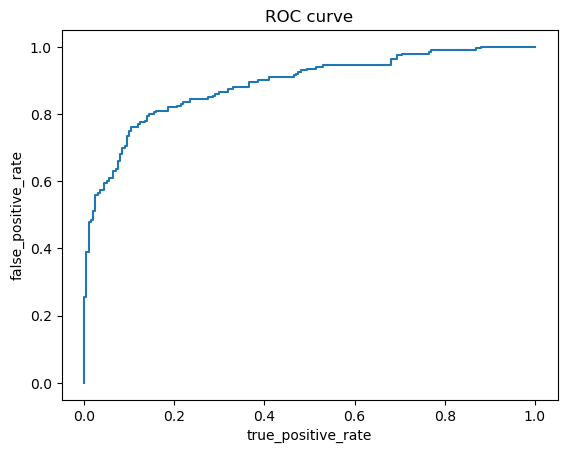

In [122]:
%matplotlib inline
plt.xlabel('true_positive_rate')
plt.ylabel('false_positive_rate')
plt.title('ROC curve')
plt.plot(false_positive_rate,true_positive_rate)
plt.show()